![lop](../../images/logo_diive1_128px.png)

<span style='font-size:32px; display:block;'>
<b>
    Format EddyPro _fluxnet_ output files for upload to FLUXNET database
</b>
</span>

---
**Notebook version**: `5` (24 Feb 2025)  
**Author**: Lukas Hörtnagl (holukas@ethz.ch)  

</br>

# **Background**

- Eddypro outputs `_fluxnet_` files
- The files cannot be directly uploaded to the FLUXNET database
- The class `FormatEddyProFluxnetFileForUpload` helps in formatting the files to comply with FLUXNET requirements for data sharing

More info:
- [FLUXNET Requirements for Data Sharing](https://www.swissfluxnet.ethz.ch/index.php/knowledge-base/fluxnet-requirements/)
- [Data submission - General Information](http://www.europe-fluxdata.eu/home/guidelines/how-to-submit-data/general-information)
- [FLUXNET Variables codes](http://www.europe-fluxdata.eu/home/guidelines/how-to-submit-data/variables-codes)

</br>

# **Imports**

In [1]:
import importlib.metadata
import warnings
from datetime import datetime

import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np

from diive.core.plotting.heatmap_datetime import HeatmapDateTime  # For plotting heatmaps
from diive.core.plotting.timeseries import TimeSeries  # For simple (interactive) time series plotting
from diive.pkgs.formats.fluxnet import FormatEddyProFluxnetFileForUpload  # Class to format output files for upload

warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)

version_diive = importlib.metadata.version("diive")
print(f"diive version: v{version_diive}")

diive version: v0.85.6


</br>

# **Docstring**

In [2]:
# help(FormatEddyProFluxnetFileForUpload)

</br>

# **Input and output folders**

In [3]:
SOURCE = r"F:\TMP\format_FXN\IN"  # This is the folder where datafiles are searched
OUTDIR = r"F:\TMP\format_FXN\OUT"  # Output yearly CSV to this folder

</br>

# **Format data**

## Initialize

In [4]:
fxn = FormatEddyProFluxnetFileForUpload(
    site='CH-FRU',
    use_co2=True,
    use_h2o=True,
    use_h=True,
    use_n2o=False,
    use_ch4=False,
    use_wind=True,
    use_meteo=True,
    sourcedir=SOURCE,
    outdir=OUTDIR,
    add_runid=True)


Initiated formatting for datafiles with the following settings:
    site: CH-FRU
    source folder: F:\TMP\format_FXN\IN
    output folder: F:\TMP\format_FXN\OUT
    add run ID: True

Searching for the following variables in the output file:
    FC
    FC_SSITC_TEST
    SC_SINGLE
    CO2
    LE
    LE_SSITC_TEST
    SLE_SINGLE
    H2O
    H
    H_SSITC_TEST
    SH_SINGLE
    USTAR
    WD
    WS
    FETCH_70
    FETCH_90
    FETCH_MAX
    SW_IN_1_1_1
    TA_1_1_1
    RH_1_1_1
    PA_1_1_1
    LW_IN_1_1_1
    PPFD_IN_1_1_1
    G_1_1_1
    NETRAD_1_1_1
    TS_1_1_1
    P_1_1_1
    SWC_1_1_1


## Search and merge `_fluxnet_` datafiles

In [5]:
fxn.mergefiles(limit_n_files=None)


Searching for EDDYPRO-FLUXNET-CSV-30MIN files with extension .csv andID _fluxnet_ in folder F:\TMP\format_FXN\IN ...
    Found 2 files:
   --> F:\TMP\format_FXN\IN\2022_eddypro_CH-FRU_FR-20230425-205042_fluxnet_2023-04-26T222351_adv.csv
   --> F:\TMP\format_FXN\IN\2023_eddypro_CH-FRU_FR-20240203-162408_fluxnet_2024-02-04T124104_adv.csv
Reading file 2022_eddypro_CH-FRU_FR-20230425-205042_fluxnet_2023-04-26T222351_adv.csv ...
Reading file 2023_eddypro_CH-FRU_FR-20240203-162408_fluxnet_2024-02-04T124104_adv.csv ...


## Merged dataset

In [6]:
fxn.merged_df

,AIR_CP,AIR_DENSITY,AIR_MV,AIR_RHO_CP,AOA_METHOD,AXES_ROTATION_METHOD,BADM_HEIGHTC,BADM_INSTPAIR_EASTWARD_SEP_GA_CH4,BADM_INSTPAIR_EASTWARD_SEP_GA_CO2,BADM_INSTPAIR_EASTWARD_SEP_GA_H2O,BADM_INSTPAIR_EASTWARD_SEP_GA_NONE,BADM_INSTPAIR_HEIGHT_SEP_GA_CH4,BADM_INSTPAIR_HEIGHT_SEP_GA_CO2,BADM_INSTPAIR_HEIGHT_SEP_GA_H2O,BADM_INSTPAIR_HEIGHT_SEP_GA_NONE,BADM_INSTPAIR_NORTHWARD_SEP_GA_CH4,BADM_INSTPAIR_NORTHWARD_SEP_GA_CO2,BADM_INSTPAIR_NORTHWARD_SEP_GA_H2O,BADM_INSTPAIR_NORTHWARD_SEP_GA_NONE,BADM_INST_AVERAGING_INT,BADM_INST_GA_CP_TUBE_FLOW_RATE_GA_CH4,BADM_INST_GA_CP_TUBE_FLOW_RATE_GA_CO2,BADM_INST_GA_CP_TUBE_FLOW_RATE_GA_H2O,BADM_INST_GA_CP_TUBE_FLOW_RATE_GA_NONE,BADM_INST_GA_CP_TUBE_IN_DIAM_GA_CH4,...,W_MEDIAN,W_NONE_MEAS_COV,W_NUM_SPIKES,W_P25,W_P75,W_SIGMA,W_SKW,W_SPIKE_NREX,W_T_SONIC_COV,W_T_SONIC_COV_IBROM,W_T_SONIC_COV_IBROM_N0004,W_T_SONIC_COV_IBROM_N0008,W_T_SONIC_COV_IBROM_N0016,W_T_SONIC_COV_IBROM_N0032,W_T_SONIC_COV_IBROM_N0065,W_T_SONIC_COV_IBROM_N0133,W_T_SONIC_COV_IBROM_N0277,W_T_SONIC_COV_IBROM_N0614,W_T_SONIC_COV_IBROM_N1626,W_UNROT,W_U_COV,W_VM97_TEST,W_ZCD,ZL,ZL_UNCORR
TIMESTAMP_MIDDLE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-12-31 19:15:00,1009.36,1.12367,0.025704,1134.19,0.0,1.0,0.4,NaN,-17.5,-17.5,NaN,NaN,0.0,0.0,NaN,NaN,28.8,28.8,NaN,30.0,NaN,NaN,NaN,NaN,NaN,...,0.008043,NaN,12.0,-0.046886,0.059207,0.111605,-2.313830,24.0,-0.011585,-0.011782,-0.004664,-0.005686,-0.006689,-0.007831,-0.009032,-0.010045,-0.010819,-0.011346,-0.011651,0.052636,0.008063,800001111.0,1459.0,0.431411,0.423193
2021-12-31 19:45:00,1009.40,1.12604,0.025649,1136.63,0.0,1.0,0.4,NaN,-17.5,-17.5,NaN,NaN,0.0,0.0,NaN,NaN,28.8,28.8,NaN,30.0,NaN,NaN,NaN,NaN,NaN,...,0.005877,NaN,11.0,-0.066067,0.072060,0.127006,-0.273635,19.0,-0.009234,-0.009843,0.000178,-0.000139,-0.000974,-0.002371,-0.004197,-0.006101,-0.007732,-0.008895,-0.009565,0.130878,0.002737,800000111.0,293.0,1.817950,1.793670
2021-12-31 20:15:00,1009.47,1.12607,0.025647,1136.73,0.0,1.0,0.4,NaN,-17.5,-17.5,NaN,NaN,0.0,0.0,NaN,NaN,28.8,28.8,NaN,30.0,NaN,NaN,NaN,NaN,NaN,...,0.006442,NaN,11.0,-0.064751,0.073261,0.142977,-0.504030,17.0,-0.016142,-0.014533,-0.001442,-0.002849,-0.004664,-0.006625,-0.008593,-0.010350,-0.011867,-0.013136,-0.014044,0.158312,-0.007224,800000111.0,167.0,0.666268,0.652929
2021-12-31 20:45:00,1009.47,1.12359,0.025704,1134.23,0.0,1.0,0.4,NaN,-17.5,-17.5,NaN,NaN,0.0,0.0,NaN,NaN,28.8,28.8,NaN,30.0,NaN,NaN,NaN,NaN,NaN,...,0.005310,NaN,24.0,-0.103015,0.112502,0.254317,-0.322086,48.0,-0.026761,-0.024738,0.001459,0.000326,-0.002290,-0.006107,-0.010749,-0.015337,-0.019131,-0.021937,-0.023777,0.185342,-0.008428,800001101.0,89.0,0.943306,0.925796
2021-12-31 21:15:00,1009.31,1.12403,0.025697,1134.50,0.0,1.0,0.4,NaN,-17.5,-17.5,NaN,NaN,0.0,0.0,NaN,NaN,28.8,28.8,NaN,30.0,NaN,NaN,NaN,NaN,NaN,...,0.010318,NaN,26.0,-0.072832,0.085115,0.201531,-0.369792,44.0,-0.032202,-0.034049,-0.007682,-0.011050,-0.015033,-0.019287,-0.023509,-0.027292,-0.030312,-0.032372,-0.033535,0.099448,-0.012181,800001111.0,525.0,0.526944,0.514241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-24 20:15:00,1010.34,1.11329,0.025925,1124.80,0.0,1.0,0.4,NaN,-17.5,-17.5,NaN,NaN,0.0,0.0,NaN,NaN,28.8,28.8,NaN,30.0,NaN,NaN,NaN,NaN,NaN,...,0.001677,NaN,17.0,-0.047773,0.051028,0.116171,-1.080730,33.0,-0.006145,-0.004260,-0.000878,-0.001323,-0.001992,-0.002696,-0.003322,-0.003783,-0.004054,-0.004185,-0.004240,0.015518,-0.001392,800001111.0,2475.0,1.232210,1.147760
2023-04-24 20:45:00,1010.61,1.11398,0.025905,1125.80,0.0,1.0,0.4,NaN,-17.5,-17.5,NaN,NaN,0.0,0.0,NaN,NaN,28.8,28.8,NaN,30.0,NaN,NaN,NaN,NaN,NaN,...,0.008381,NaN,0.0,-0.057510,0.060445,0.112314,-0.210080,0.0,-0.006712,-0.005266,-0.001878,-0.002137,-0.002561,-0.003102,-0.003680,-0.004199,-0.004623,-0.004946,-0.005160,0.045646,-0.013388,800000111.0,1006.0,0.077553,0.073021
2023-04-24 2

## Test for signal strength / AGC

<div class="alert alert-block alert-info">
    <b>Skip this part if not applicable for your data.</b>
</div>

<div class="alert alert-block alert-danger">
    <b>Do not use for H (sensible heat flux).</b> This test is only relevant for fluxes where the concentration was measured by a gas analyzer, e.g. FC, FH2O, LE, ET, N2O, CH4, etc ... 
</div>

In [7]:
FLUXCOLS = ['FC', 'LE']  # Give flux columns as list
SIGNAL_STRENGTH_COL = 'CUSTOM_AGC_MEAN'  # Name of the column storing the signal strength, typically 'CUSTOM_AGC_MEAN' for LI-7500, 'CUSTOM_SIGNAL_STRENGTH_IRGA72_MEAN' for LI-7200, or something similar
SIGNAL_STRENGTH_THRESHOLD = 90  # Signal strength threshold, flux values where threshold is exceeded are flagged as rejected
SIGNAL_STRENGTH_METHOD = 'discard above'  # 'discard above' flags fluxes where signal strength > threshold, 'discard below' where signal strength < threshold

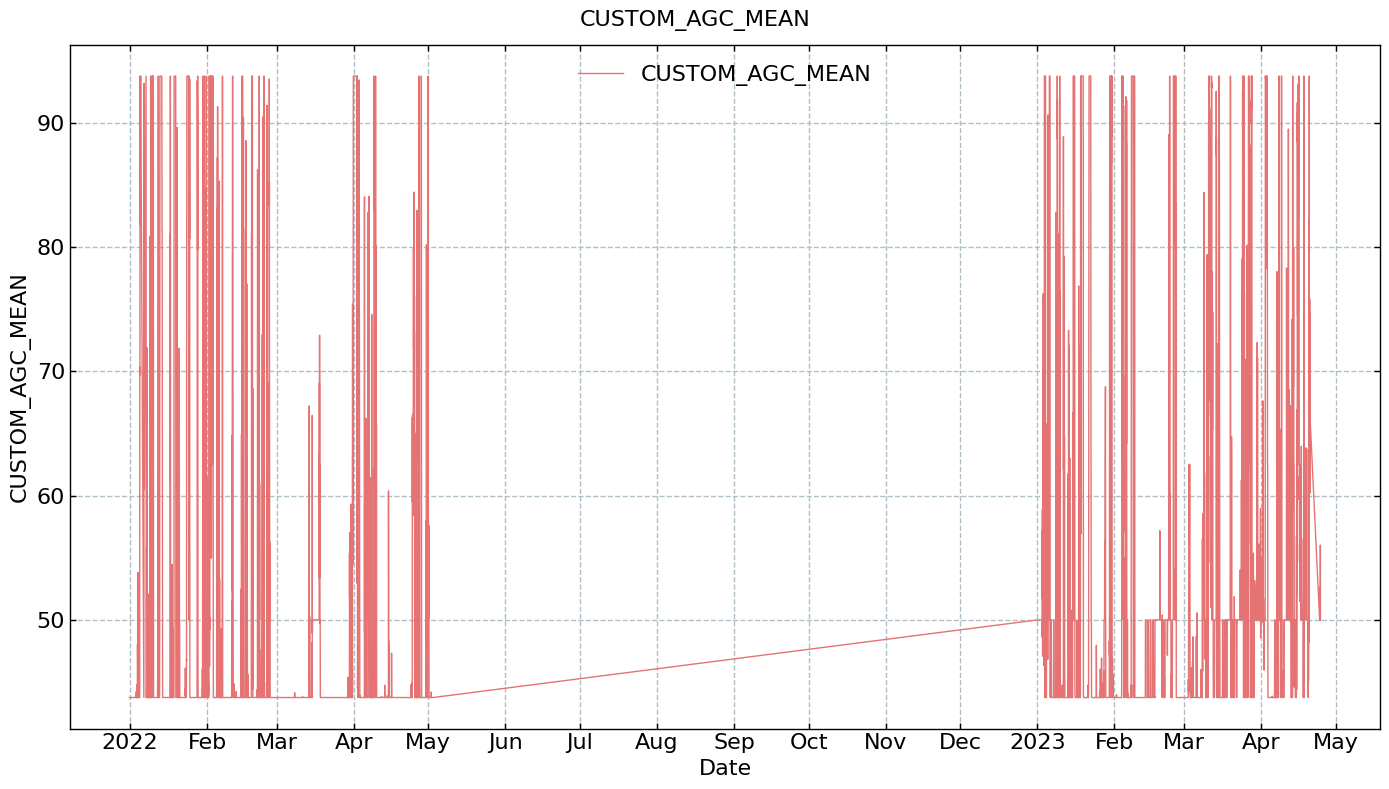

In [8]:
# TimeSeries(series=fxn.merged_df[SIGNAL_STRENGTH_COL]).plot_interactive()
TimeSeries(series=fxn.merged_df[SIGNAL_STRENGTH_COL]).plot()

In [9]:
for f in FLUXCOLS:
    fxn.remove_low_signal_data(fluxcol=f,
                               signal_strength_col=SIGNAL_STRENGTH_COL,
                               method=SIGNAL_STRENGTH_METHOD,
                               threshold=SIGNAL_STRENGTH_THRESHOLD)



Removing FC flux values where signal strength / AGC is not sufficient:

Performing signal strength / AGC quality check ...

SIGNAL STRENGTH TEST: Generating new flag variable FLAG_L2_FC_SIGNAL_STRENGTH_TEST, newly calculated from output variable CUSTOM_AGC_MEAN, with flag 0 (good values) where CUSTOM_AGC_MEAN <= 90, flag 2 (bad values) where CUSTOM_AGC_MEAN > 90 ...
CUSTOM_AGC_MEAN rejected 618 values of FC, all rejected value were removed from the dataset.

Available values of FC before removing low signal fluxes: 10219
Available values of FC after removing low signal fluxes: 9843

Removing all newly generated columns relating to quality check (not needed for FLUXNET), restoring original set of variables ...


Removing LE flux values where signal strength / AGC is not sufficient:

Performing signal strength / AGC quality check ...

SIGNAL STRENGTH TEST: Generating new flag variable FLAG_L2_LE_SIGNAL_STRENGTH_TEST, newly calculated from output variable CUSTOM_AGC_MEAN, with flag 0 (g

## Remove problematic time periods
               
Use `REMOVE_DATES` to specify the time period(s) for `VAR` that are removed from the dataset.

For example:

```python
REMOVE_DATES = ['2022-06-30 23:58:30',
                ['2022-06-05 00:00:30', '2022-06-07 14:30:00']]
```
will remove the record for `2022-06-30 23:58:30` and all records between
`2022-06-05 00:00:30` (inclusive) and `2022-06-07 14:30:00` (inclusive).

This also works when providing only the date, e.g.
```python
REMOVE_DATES = [['2006-05-01', '2006-07-18']] 
```
will remove all data points between `2006-05-01` (inclusive) and `2006-07-18` (inclusive).

<div class="alert alert-block alert-info">
    <b>Skip this part if not applicable for your data.</b>
</div>

### Plot affected variables

In [10]:
# VAR = ['FC']
# for v in VAR:
#     # TimeSeries(series=fxn.merged_df[v]).plot_interactive()
#     TimeSeries(series=fxn.merged_df[v]).plot()

In [11]:
# # These variables are erroneous during the defined time period
# VAR = ['FC', 'LE']  
# REMOVE_DATES = [    
#     ['2024-08-17', '2024-08-18'],
#     # ['2017-06-12 18:00', '2017-06-16 11:00']
# ]

In [12]:
# for v in VAR:
#     fxn.remove_erroneous_data(var=v,
#                               remove_dates=REMOVE_DATES,
#                               showplot=True)

## Format data for FLUXNET

In [13]:
fxn.apply_fluxnet_format()


Assembling subset of variables ...
  > Removing empty variables ...
  > Collecting available data ...
      searching for FC ... found FC OK
      searching for FC_SSITC_TEST ... found FC_SSITC_TEST OK
      searching for SC_SINGLE ... found SC_SINGLE OK
      searching for CO2 ... found CO2 OK
      searching for LE ... found LE OK
      searching for LE_SSITC_TEST ... found LE_SSITC_TEST OK
      searching for SLE_SINGLE ... found SLE_SINGLE OK
      searching for H2O ... found H2O OK
      searching for H ... found H OK
      searching for H_SSITC_TEST ... found H_SSITC_TEST OK
      searching for SH_SINGLE ... found SH_SINGLE OK
      searching for USTAR ... found USTAR OK
      searching for WD ... found WD OK
      searching for WS ... found WS OK
      searching for FETCH_70 ... found FETCH_70 OK
      searching for FETCH_90 ... found FETCH_90 OK
      searching for FETCH_MAX ... found FETCH_MAX OK
      searching for SW_IN_1_1_1 ... found SW_IN_1_1_1 OK
      searching for TA_

## Save yearly `CSV` files

In [14]:
fxn.export_yearly_files()


Saving yearly CSV files ...
    --> Saved file F:\TMP\format_FXN\OUT\CH-FRU_2021_fluxes_meteo_20250224.csv.
    --> Saved file F:\TMP\format_FXN\OUT\CH-FRU_2022_fluxes_meteo_20250224.csv.
    --> Saved file F:\TMP\format_FXN\OUT\CH-FRU_2023_fluxes_meteo_20250224.csv.


</br>

# **Check FLUXNET data**

- The merged file data from all files can be directly returned with `.get_data()`
- Note that the dataframe below does not show exactly how the data look like in the formatted data files, but how data were stored in `diive`, hence the timestamp index `TIMESTAMP_MIDDLE`
- The yearly files do not contain the timestamp index `TIMESTAMP_MIDDLE`

## Dataframe that was used to generate yearly files

In [15]:
data_fluxnet = fxn.get_data()
data_fluxnet

,TIMESTAMP_START,TIMESTAMP_END,FC_1_1_1,FC_SSITC_TEST_1_1_1,SC_1_1_1,CO2_1_1_1,LE_1_1_1,LE_SSITC_TEST_1_1_1,SLE_1_1_1,H2O_1_1_1,H_1_1_1,H_SSITC_TEST_1_1_1,SH_1_1_1,USTAR_1_1_1,WD_1_1_1,WS_1_1_1,FETCH_70_1_1_1,FETCH_90_1_1_1,FETCH_MAX_1_1_1,SW_IN_1_1_1,TA_1_1_1,RH_1_1_1,LW_IN_1_1_1,PPFD_IN_1_1_1
TIMESTAMP_MIDDLE,,,,,,,,,,,,,,,,,,,,,,,,
2021-12-31 19:15:00,202112311900,202112311930,2.61878,1.0,-9999.000000,419.940,2.022160,1.0,-9999.000000,7.47957,-13.84210,1.0,-9999.000000,0.096333,184.5800,1.096770,-9999.0,-9999.0,-9999.0,0.0,9.77229,56.7827,255.463,0.0
2021-12-31 19:45:00,202112311930,202112312000,2.21663,0.0,0.139285,422.462,-3.450700,2.0,0.223776,7.57029,-11.65970,0.0,-0.799253,0.056321,185.4810,1.948410,-9999.0,-9999.0,-9999.0,0.0,9.27593,59.4448,254.889,0.0
2021-12-31 20:15:00,202112312000,202112312030,1.98013,0.0,-0.149416,419.757,1.759150,0.0,0.239649,7.66746,-19.69600,0.0,0.098742,0.093722,173.7660,2.514330,-9999.0,-9999.0,-9999.0,0.0,9.33724,59.9767,255.589,0.0
2021-12-31 20:45:00,202112312030,202112312100,2.22815,1.0,-0.063978,418.596,-0.526437,2.0,0.000809,7.66778,-32.97660,1.0,0.905949,0.099115,190.8760,2.579250,-9999.0,-9999.0,-9999.0,0.0,9.90106,57.7375,255.425,0.0
2021-12-31 21:15:00,202112312100,202112312130,1.73563,0.0,-0.075260,417.231,8.717420,0.0,-0.689961,7.38739,-38.88950,0.0,-0.148962,0.127151,211.9930,1.536290,-9999.0,-9999.0,-9999.0,0.0,9.80837,55.9704,255.563,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-24 20:15:00,202304242000,202304242030,8.07564,0.0,0.401764,434.382,11.332400,0.0,0.676232,9.30983,-7.89650,0.0,-0.074020,0.056098,357.6230,0.591077,-9999.0,-9999.0,-9999.0,0.0,5.51134,79.4443,313.746,0.0
2023-04-24 20:45:00,202304242030,202304242100,10.36230,1.0,0.098809,436.225,9.656340,1.0,1.202280,9.81119,-8.17100,1.0,-0.271423,0.142634,35.2975,0.850538,-9999.0,-9999.0,-9999.0,0.0,5.14396,84.7358,317.689,0.0
2023-04-24 21:15:00,202304242100,202304242130,-3.06726,2.0,6.576790,558.887,25.361300,2.0,-0.467890,9.61607,-7.69871,1.0,0.041104,0.130499,212.2350,0.645818,-9999.0,-9999.0,-9999.0,0.0,5.27856,82.9117,330.700,0.0


In [16]:
data_fluxnet.columns.to_list()

['TIMESTAMP_START',
 'TIMESTAMP_END',
 'FC_1_1_1',
 'FC_SSITC_TEST_1_1_1',
 'SC_1_1_1',
 'CO2_1_1_1',
 'LE_1_1_1',
 'LE_SSITC_TEST_1_1_1',
 'SLE_1_1_1',
 'H2O_1_1_1',
 'H_1_1_1',
 'H_SSITC_TEST_1_1_1',
 'SH_1_1_1',
 'USTAR_1_1_1',
 'WD_1_1_1',
 'WS_1_1_1',
 'FETCH_70_1_1_1',
 'FETCH_90_1_1_1',
 'FETCH_MAX_1_1_1',
 'SW_IN_1_1_1',
 'TA_1_1_1',
 'RH_1_1_1',
 'LW_IN_1_1_1',
 'PPFD_IN_1_1_1']

## Overview of variables and some stats

In [17]:
# print(*data_fluxnet.columns, sep = "\n")
data_fluxnet.describe().T

,count,mean,std,min,25%,50%,75%,max
FC_1_1_1,22999.0,-5720.065379,4947.038560,-9999.0,-9999.0,-9999.0,-0.680791,572.43900
FC_SSITC_TEST_1_1_1,22999.0,-5555.934693,4968.821184,-9999.0,-9999.0,-9999.0,0.000000,2.00000
SC_1_1_1,22999.0,-5643.173043,4957.985212,-9999.0,-9999.0,-9999.0,-0.013564,18.00230
CO2_1_1_1,22999.0,-5361.024814,5186.898517,-9999.0,-9999.0,-9999.0,425.674500,896.01500
LE_1_1_1,22999.0,-5893.218435,4930.653180,-9999.0,-9999.0,-9999.0,2.720390,977.54800
LE_SSITC_TEST_1_1_1,22999.0,-5844.191356,4927.997727,-9999.0,-9999.0,-9999.0,0.000000,2.00000
SLE_1_1_1,22999.0,-5162.542682,5107.512007,-25987.5,-9999.0,-9999.0,-0.030037,50596.90000
H2O_1_1_1,22999.0,-5841.553807,4931.126323,-9999.0,-9999.0,-9999.0,5.894725,14.80380
H_1_1_1,22999.0,-5149.883903,4997.948562,-9999.0,-9999.0,-9999.0,-1.861610,826.67900
H_SSITC_TEST_1_1_1,22999.0,-5149.822862,4997.669196,-9999.0,-9999.0,-9999.0,0.000000,2.00000


## Plot some key variables
- Keep in mind that FLUXNET requires missing values as `-9999` when looking at the plots

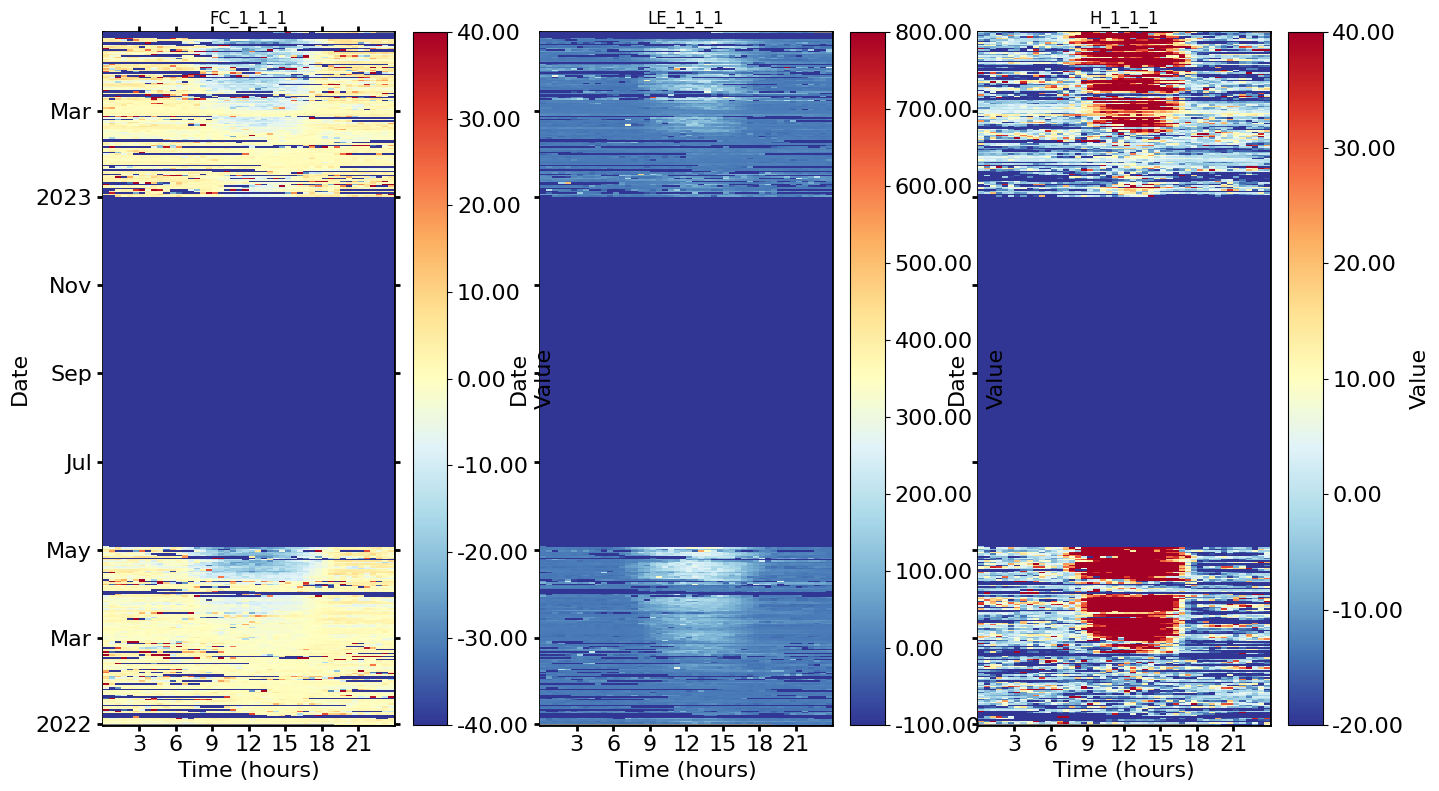

In [18]:
fig = plt.figure(facecolor='white', figsize=(16, 9))
gs = gridspec.GridSpec(1, 3)  # rows, cols
ax_fc = fig.add_subplot(gs[0, 0])
ax_le = fig.add_subplot(gs[0, 1])
ax_ta = fig.add_subplot(gs[0, 2])
HeatmapDateTime(ax=ax_fc, series=data_fluxnet['FC_1_1_1'], vmin=-40, vmax=40).plot()
HeatmapDateTime(ax=ax_le, series=data_fluxnet['LE_1_1_1'], vmin=-100, vmax=800).plot()
HeatmapDateTime(ax=ax_ta, series=data_fluxnet['H_1_1_1'], vmin=-20, vmax=40).plot()
ax_fc.set_title("FC_1_1_1", color='black')
ax_le.set_title("LE_1_1_1", color='black')
ax_ta.set_title("H_1_1_1", color='black')
ax_le.tick_params(left=True, right=False, top=False, bottom=True,
                  labelleft=False, labelright=False, labeltop=False, labelbottom=True)
ax_ta.tick_params(left=True, right=False, top=False, bottom=True,
                  labelleft=False, labelright=False, labeltop=False, labelbottom=True)

## Plot all variables

C:\Users\holukas\AppData\Local\Temp\ipykernel_21664\1592564276.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(facecolor='white', figsize=(4, 8))


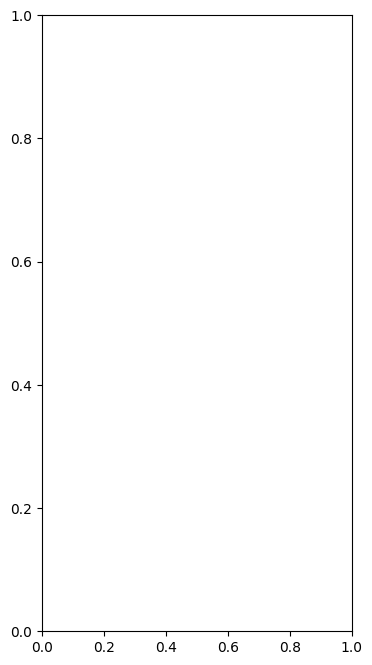

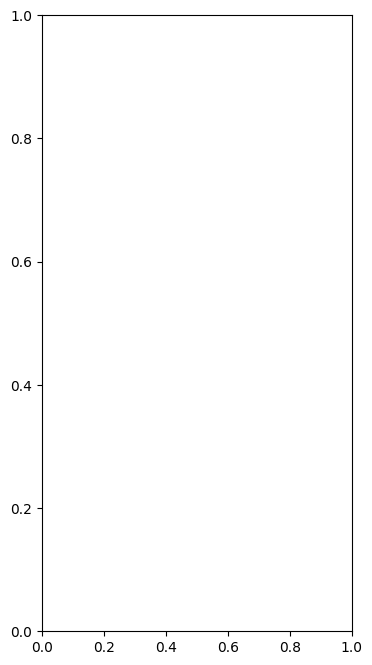

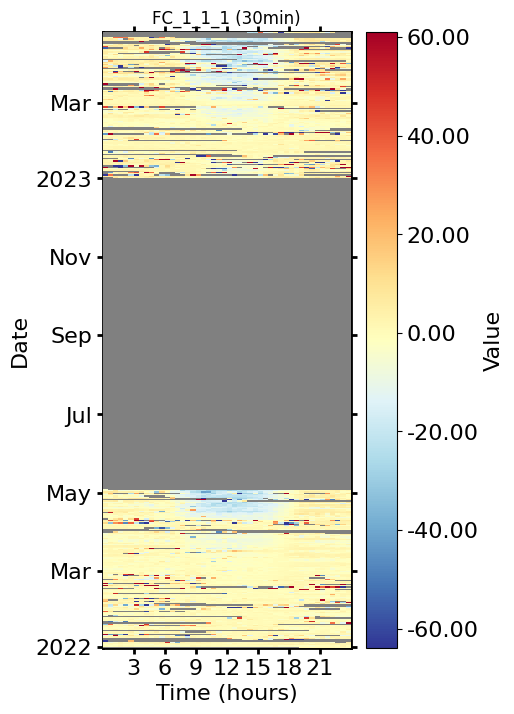

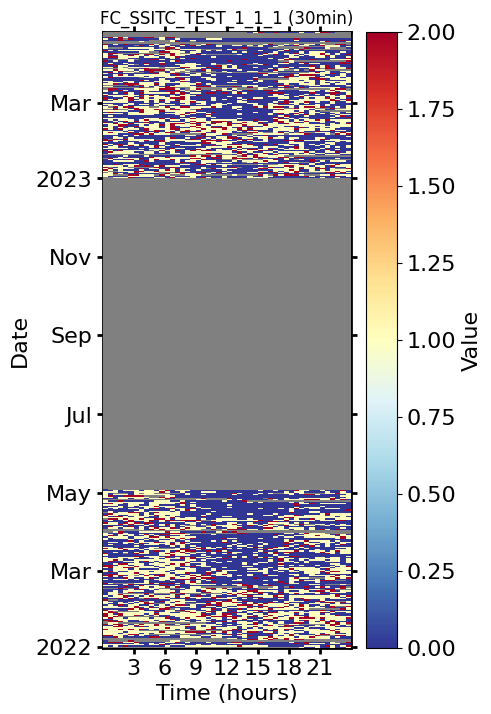

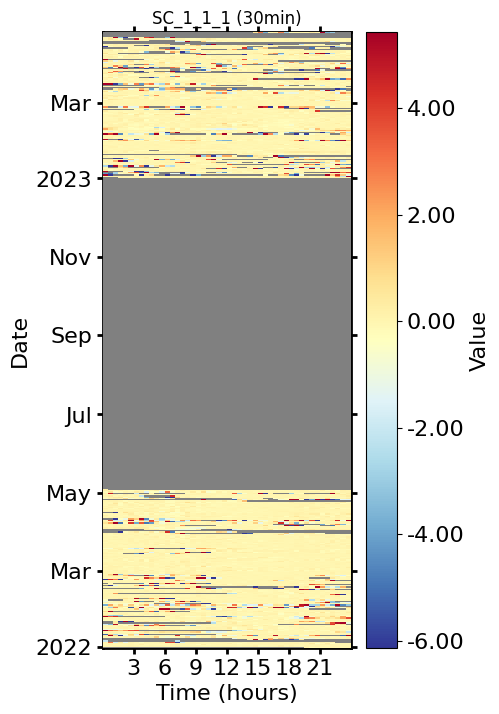

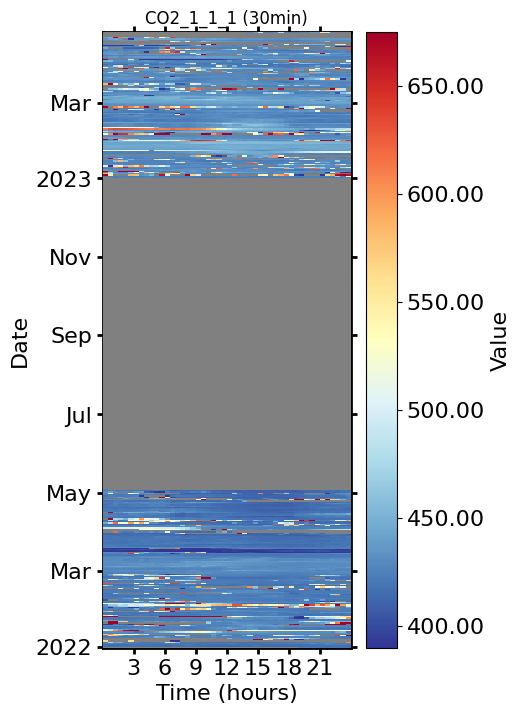

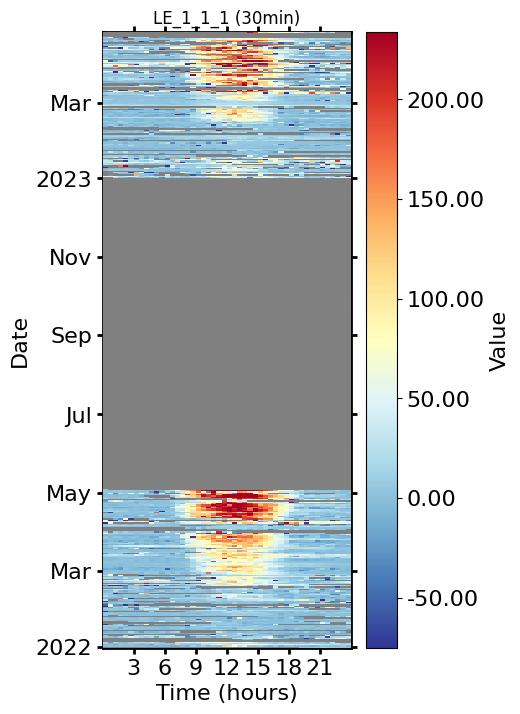

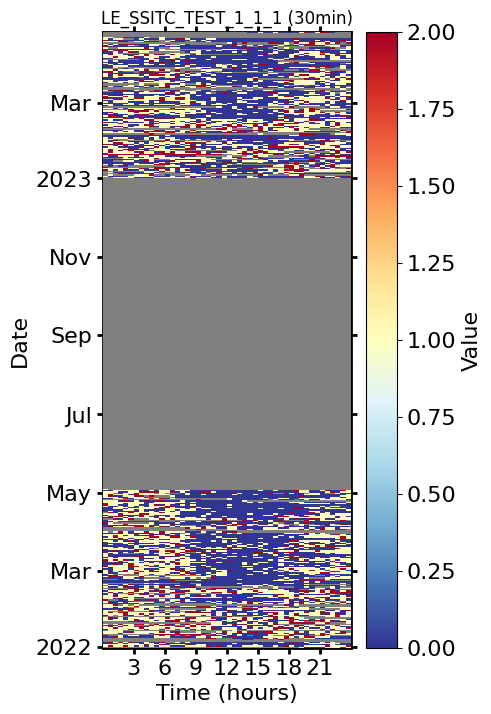

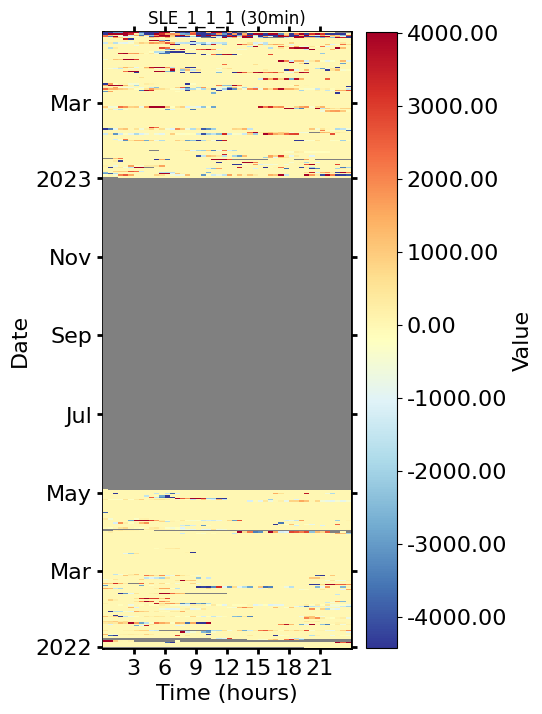

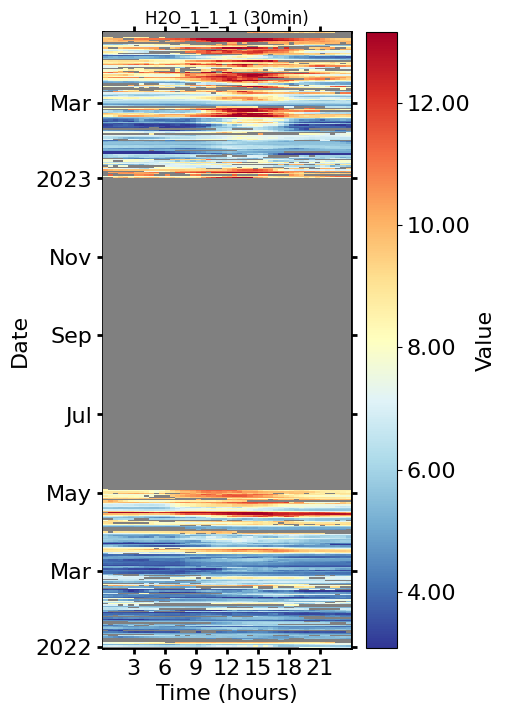

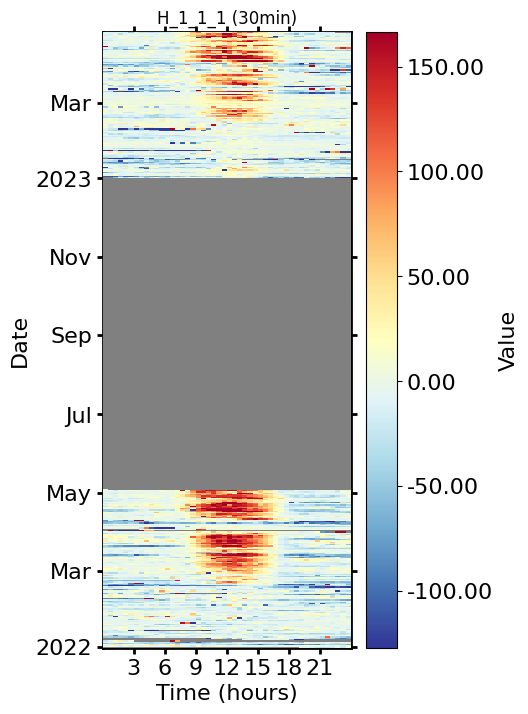

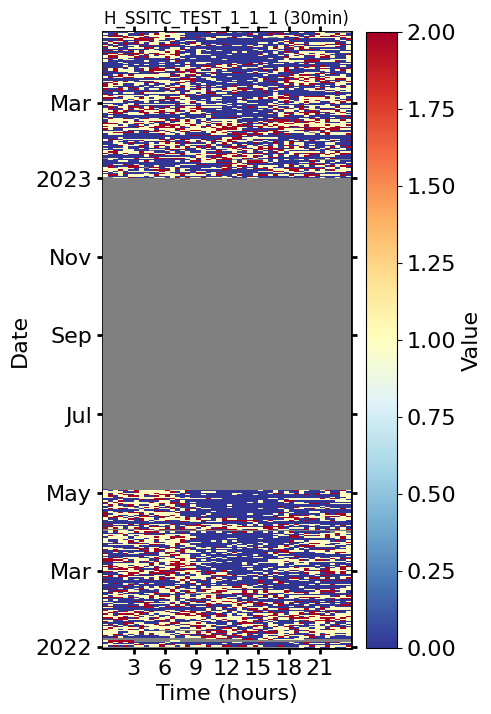

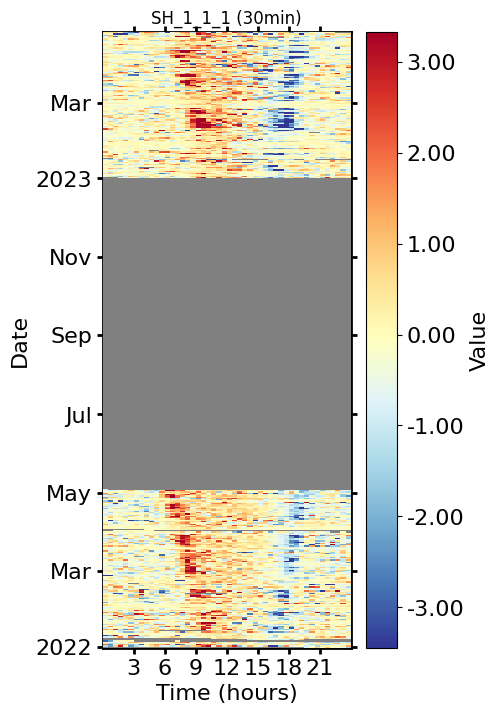

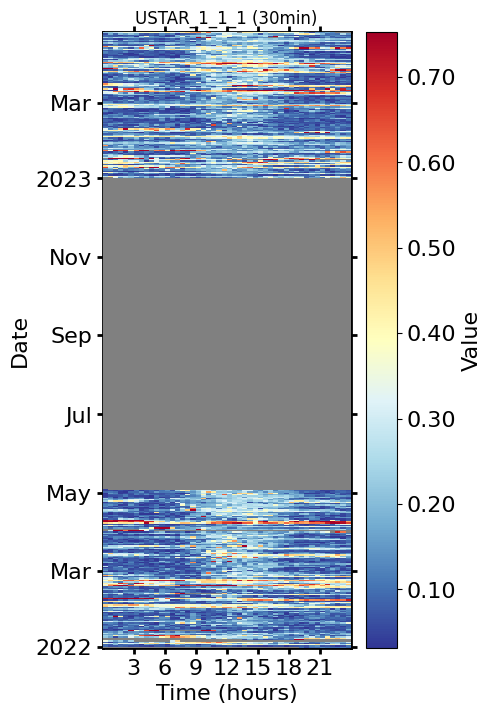

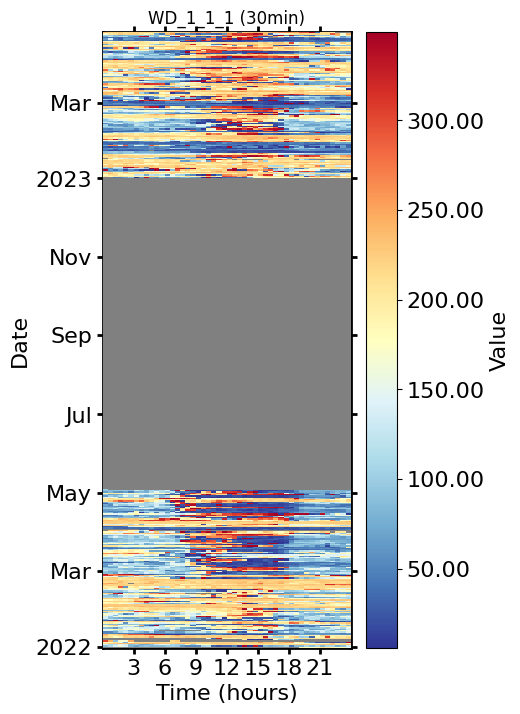

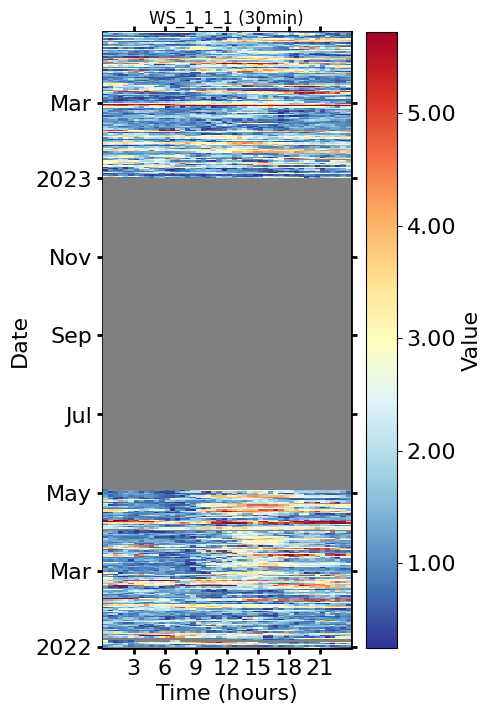

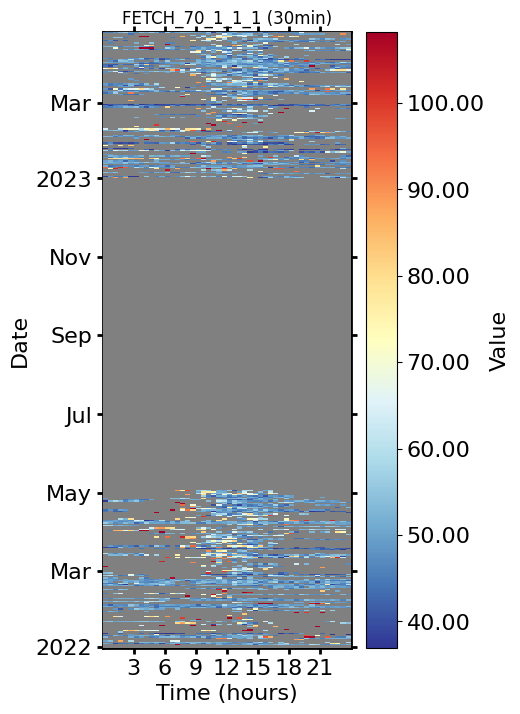

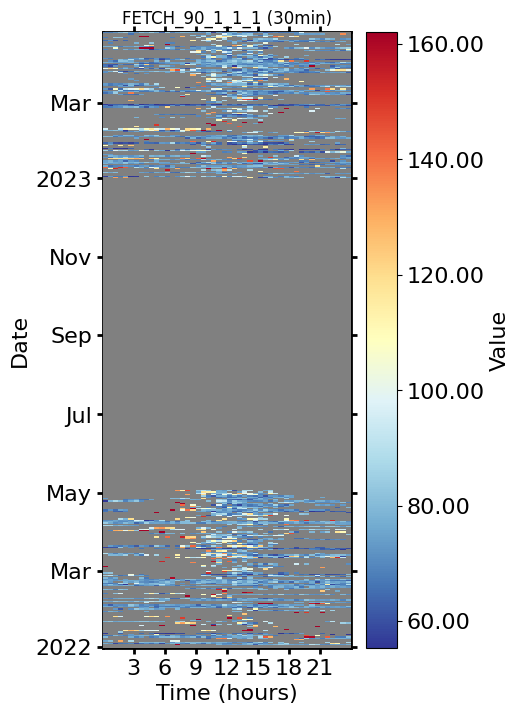

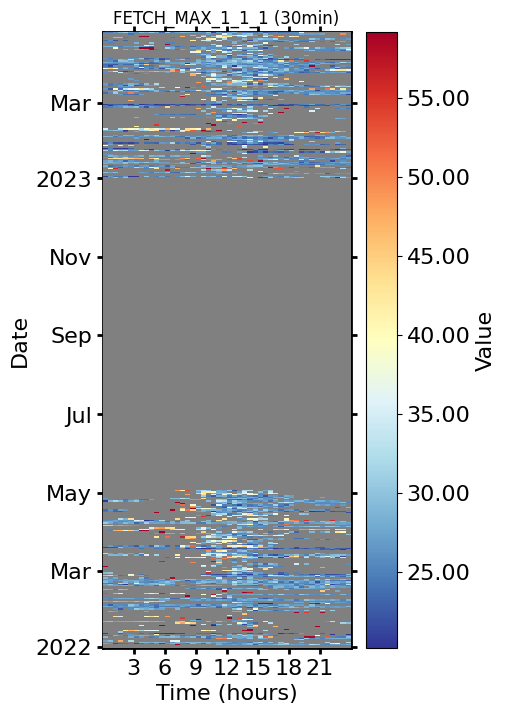

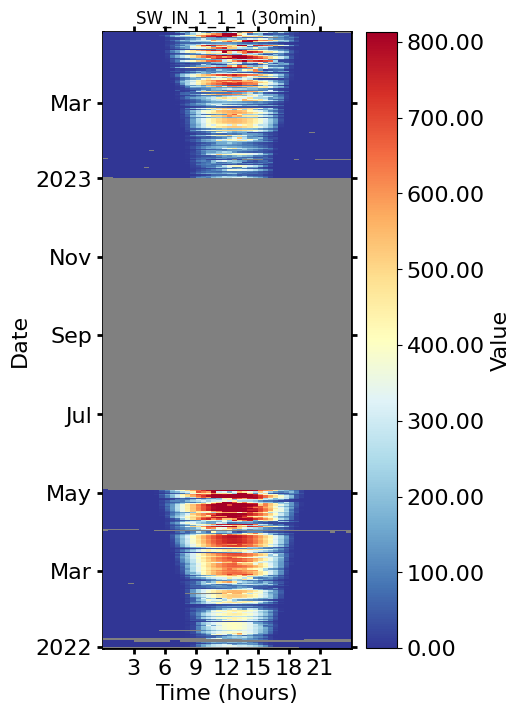

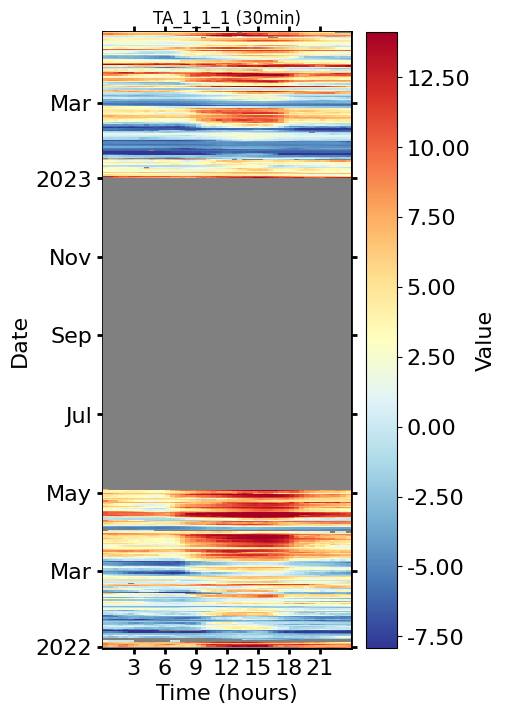

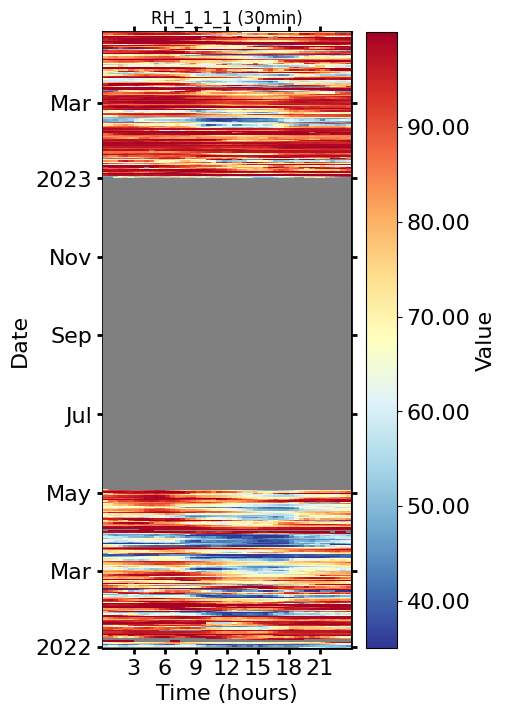

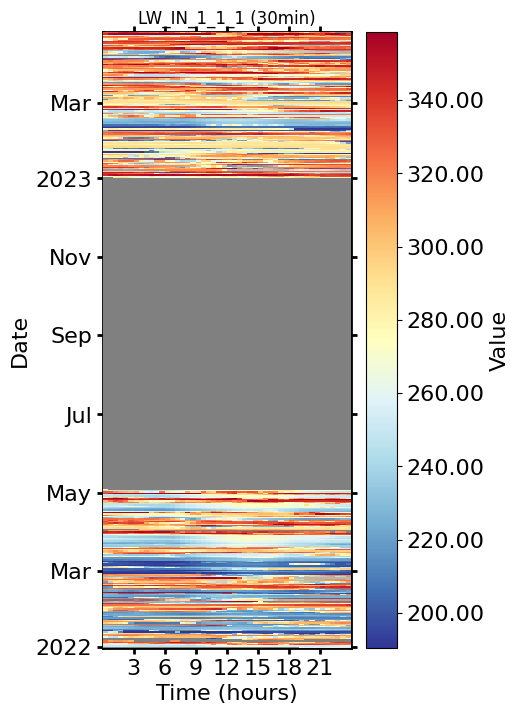

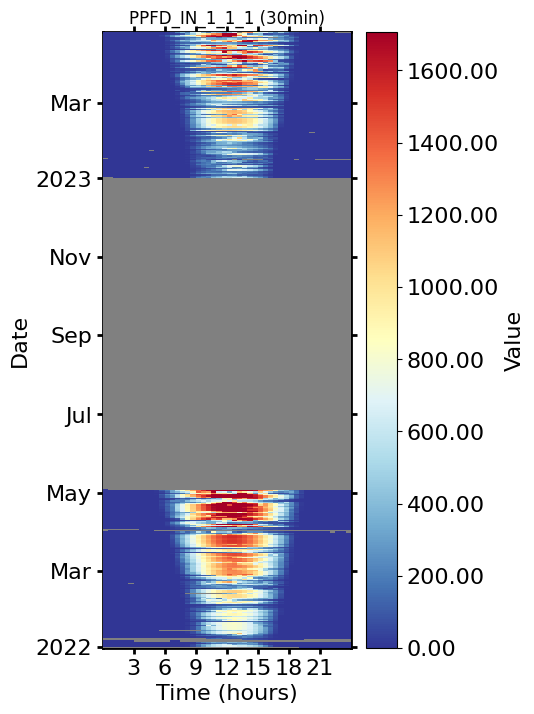

In [27]:
for col in data_fluxnet.columns:
    series = data_fluxnet[col].copy()
    series.replace(to_replace=-9999, value=np.nan, inplace=True)
    try:        
        fig = plt.figure(facecolor='white', figsize=(4, 8))
        gs = gridspec.GridSpec(1, 1)  # rows, cols
        ax = fig.add_subplot(gs[0, 0])
        vmin = series.quantile(.01)
        vmax = series.quantile(.99)
        HeatmapDateTime(ax=ax, series=series, vmin=vmin, vmax=vmax).plot()
        ax_fc.set_title(col, color='black')
        fig.show()        
    except TypeError:
        pass        

</br>

# **End of notebook**

In [20]:
dt_string = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"Finished {dt_string}")

Finished 2025-02-24 16:50:28
